![Parked car](car.jpg)

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries, insurance is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance has requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to use simple Logistic Regression, identifying the single feature that results in the best-performing model, as measured by accuracy.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table (below) detailing the column names and descriptions below.

## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [28]:
# Import required libraries
library(readr)
library(dplyr)
library(glue)
library(yardstick)

# Start coding!

#First let's load the csv 

In [29]:
car_insurance_raw <- read_csv("car_insurance.csv")
head(car_insurance_raw)


Rows: 10000 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (19): id, age, gender, race, driving_experience, education, income, cred...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
569520,3,0,1,0,2,3,0.6290273,1,1,0,1,10238,12000,0,0,0,0,0
750365,0,1,1,0,0,0,0.3577571,0,0,0,0,10238,16000,0,0,0,0,1
199901,0,0,1,0,2,1,0.4931458,1,0,0,0,10238,11000,0,0,0,0,0
478866,0,1,1,0,3,1,0.2060129,1,0,0,1,32765,11000,0,0,0,0,0
731664,1,1,1,1,0,1,0.3883659,1,0,0,0,32765,12000,0,2,0,1,1
877557,2,0,1,2,2,3,0.6191274,1,1,0,1,10238,13000,0,3,0,3,0


# Now let's remove the "id" column


In [30]:
car_insurance <- car_insurance_raw %>%
select(-id)

## Confirm the "id" column was removed

In [31]:
head(car_insurance)

age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0,1,0,2,3,0.6290273,1,1,0,1,10238,12000,0,0,0,0,0
0,1,1,0,0,0,0.3577571,0,0,0,0,10238,16000,0,0,0,0,1
0,0,1,0,2,1,0.4931458,1,0,0,0,10238,11000,0,0,0,0,0
0,1,1,0,3,1,0.2060129,1,0,0,1,32765,11000,0,0,0,0,0
1,1,1,1,0,1,0.3883659,1,0,0,0,32765,12000,0,2,0,1,1
2,0,1,2,2,3,0.6191274,1,1,0,1,10238,13000,0,3,0,3,0


# Next let's investigate if any data is missing using the visdat package. 

## In order to do this first we need to install and load the visdat package

In [32]:
install.packages ("visdat")
library(visdat)



The following package(s) will be installed:
- visdat [0.6.0]
These packages will be installed into "~/renv/library/R-4.2/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing visdat ...                         OK [linked from cache]


## Now let's see what data is missing

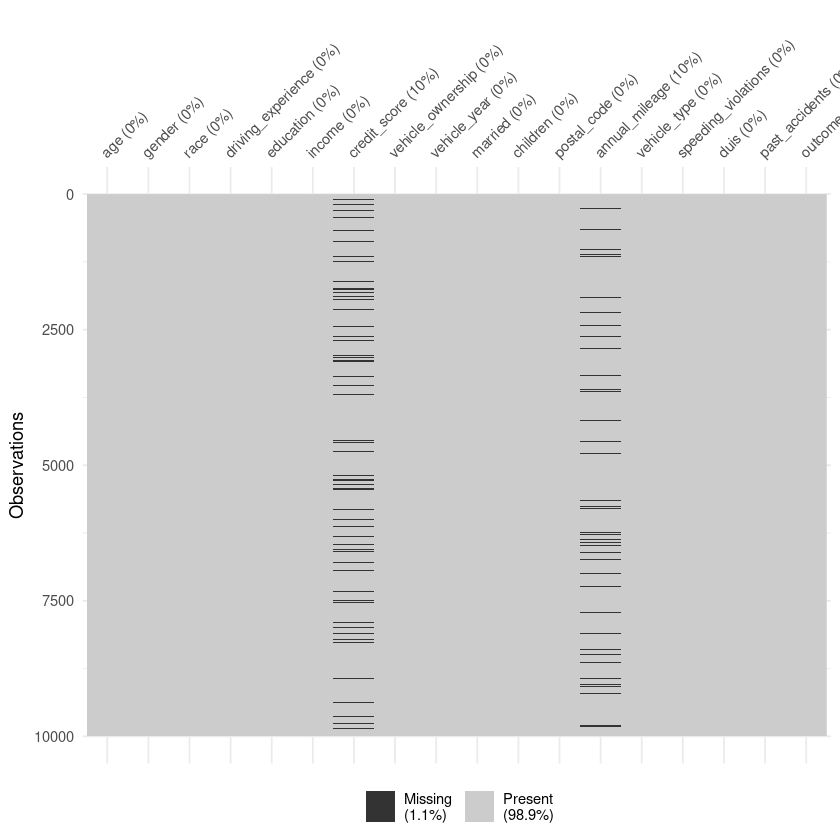

In [33]:
vis_miss(car_insurance)

## We can see that credit_score and annual_milage are missing from 10% of the data. To fix this we can either replace the missing values with the median or mean of columns or filter those values out. I prefer to filter the data out.

In [34]:
car_insurance_clean <- car_insurance %>%
  filter(!is.na(credit_score), !is.na(annual_mileage))

## Check to make sure there are no missing values

In [35]:
sum(is.na(car_insurance_clean))

[1] 0

# Before building the models let's look at some summary statistics

In [36]:
summary(car_insurance_clean)

      age          gender            race        driving_experience
 Min.   :0.0   Min.   :0.0000   Min.   :0.0000   Min.   :0.000     
 1st Qu.:1.0   1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:0.000     
 Median :1.0   Median :0.0000   Median :1.0000   Median :1.000     
 Mean   :1.5   Mean   :0.4988   Mean   :0.8986   Mean   :1.077     
 3rd Qu.:2.0   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:2.000     
 Max.   :3.0   Max.   :1.0000   Max.   :1.0000   Max.   :3.000     
   education        income       credit_score     vehicle_ownership
 Min.   :0.00   Min.   :0.000   Min.   :0.05336   Min.   :0.0000   
 1st Qu.:2.00   1st Qu.:1.000   1st Qu.:0.41789   1st Qu.:0.0000   
 Median :2.00   Median :2.000   Median :0.52676   Median :1.0000   
 Mean   :2.02   Mean   :1.913   Mean   :0.51637   Mean   :0.6992   
 3rd Qu.:3.00   3rd Qu.:3.000   3rd Qu.:0.62007   3rd Qu.:1.0000   
 Max.   :3.00   Max.   :3.000   Max.   :0.96082   Max.   :1.0000   
  vehicle_year       married         children   

# Next let's make a dataframe with all the features we will need
first we need to create a dataframe with no outcomes. Next we'll use name to pull all the names needed in the features colums

In [37]:
car_insurance_no_outcome <- car_insurance_clean %>%
select(-outcome)

features <- data.frame(feature=names(car_insurance_no_outcome))

features

feature
<chr>
age
gender
race
driving_experience
education
income
credit_score
vehicle_ownership
vehicle_year


# Now that we have the dataframe we are going to have to create a loop to go through all the models
first we need to create an empty vector to store the accuracy in. Then we'll create the loop that has the model, prediction, and accuaracy

In [38]:
model_accuracy <- c()

# Loop for features
for (col in features$feature) {
	model <- glm(glue('outcome~{col}'), data=car_insurance_clean, family="binomial")
	prediction <- round(fitted(model))
	accuracy <- mean(car_insurance_clean$outcome == prediction)
	model_accuracy <- append(model_accuracy, accuracy)
}

## Now we just need to create a data frame with the model_accuracy vector and the features data frame

In [39]:
accuracy <- cbind(features, model_accuracy)

accuracy

feature,model_accuracy
<chr>,<dbl>
age,0.7740827
gender,0.6887962
race,0.6887962
driving_experience,0.7781323
education,0.6887962
income,0.7399681
credit_score,0.7065898
vehicle_ownership,0.7392318
vehicle_year,0.6887962


## Now we just need to sort this data frame in descending order

In [40]:
accuracy<-accuracy %>%
arrange(desc(model_accuracy))

accuracy

feature,model_accuracy
<chr>,<dbl>
driving_experience,0.7781323
age,0.7740827
income,0.7399681
vehicle_ownership,0.7392318
credit_score,0.7065898
annual_mileage,0.6927230
gender,0.6887962
race,0.6887962
education,0.6887962


## Now we just need to make a data frame with the best feature and its accuracy

In [41]:
answer<-accuracy %>%
head(n=1)

best_feature_df <- answer %>%
mutate (best_feature=feature, best_accuracy=model_accuracy) %>%
select(-feature, -model_accuracy)

best_feature_df

,best_feature,best_accuracy
,<chr>,<dbl>
1,driving_experience,0.7781323
